# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Libraries

In [29]:
import os

import pandas as pd

from feature_engineering import DataManager
from feature_engineering.features import TipHistory, ReorderedRatio, DynamicFeatureTest1, DynamicFeatureTest2, \
    OrderSize, ModeDepartment, PrevTippedProductsRatio, CustomerLifetime, PrevOrderTipped, OrderFrequency, \
    SimOrdersTipRatio, ProductTipRate, DepartmentTipRate, AisleTipRate, OrderExcessLikability, AvgSizePrevOrders, \
    MeanOrderedRate, LastTipSequence, RelDaysSinceTip, DaysSinceTip

### Data Initialization

In [30]:
DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [31]:
#features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'tip_history',
#          'reordered_ratio', 'order_size', 'mode_dept', 'prev_tipped_products_ratio', 'avg_size_prev_orders']

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
mode_dept = ModeDepartment()
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()

# Tom
order_excess_likability = OrderExcessLikability()  # TODO
avg_size_prev_orders = AvgSizePrevOrders()

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [32]:
# Static Features
data_manager.register_feature(tip_history)
data_manager.register_feature(reordered_rate)
data_manager.register_feature(order_size)
data_manager.register_feature(customer_lifetime)
data_manager.register_feature(prev_order_tipped)
data_manager.register_feature(prev_tipped_products_ratio)

data_manager.register_feature(mode_dept)
data_manager.register_feature(order_frequency)
data_manager.register_feature(sim_orders_tip_ratio)
# data_manager.register_feature(order_excess_likability)
data_manager.register_feature(avg_size_prev_orders)
data_manager.register_feature(mean_ordered_rate)
data_manager.register_feature(last_tip_sequence)
data_manager.register_feature(rel_days_since_tip)
data_manager.register_feature(days_since_tip)
# 
# # Dynamic Features
# data_manager.register_feature(dynamic_feature_test_1)
# data_manager.register_feature(dynamic_feature_test_2)
data_manager.register_feature(product_tip_rate)
data_manager.register_feature(department_tip_rate)
data_manager.register_feature(aisle_tip_rate)

In [33]:
# data_manager.compute_features()

In [34]:
# data_manager.get_orders_tip().head(100)

In [35]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [36]:
data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [37]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,mean_ordered_rate,last_tip_sequence,...,tip_history,prev_order_tipped,rel_days_since_tip,days_since_tip,prev_tipped_products_ratio,sim_orders_tip_ratio,reordered_ratio,aisle_tip_rate,dept_tip_rate,product_tip_rate
0,2539329,1,prior,1,2,8,NaN,0.0,-1.000000,0.0,...,-1.0,-1.0,NaN,-1,0.0,0.000000,0.000000,-0.154412,-0.136680,-0.214783
1,2398795,1,prior,2,3,7,15.0,0.0,0.500000,0.0,...,0.0,0.0,NaN,-1,0.0,-0.187500,0.500000,-0.128714,-0.128948,-0.126002
2,473747,1,prior,3,3,12,21.0,0.0,0.500000,0.0,...,0.0,0.0,NaN,-1,0.0,-0.208333,0.600000,-0.162890,-0.153835,-0.134117
3,2254736,1,prior,4,4,7,29.0,0.0,0.666667,0.0,...,0.0,0.0,NaN,-1,0.0,-0.367560,1.000000,-0.152853,-0.136680,-0.185615
4,431534,1,prior,5,4,15,28.0,0.0,0.437500,0.0,...,0.0,0.0,NaN,-1,0.0,-0.294141,0.625000,-0.072083,-0.091502,-0.063549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0,0.125000,0.0,...,0.0,0.0,NaN,-1,0.0,-0.038462,0.250000,-0.187044,-0.169895,-0.161177
96,1057378,12,prior,4,3,9,26.0,0.0,0.083333,0.0,...,0.0,0.0,NaN,-1,0.0,-0.042316,0.250000,-0.102275,-0.115211,-0.092866
97,221248,12,prior,5,1,9,30.0,0.0,0.102273,0.0,...,0.0,0.0,NaN,-1,0.0,-0.051912,0.227273,-0.125295,-0.114649,-0.090662
98,2618231,13,prior,1,6,12,NaN,0.0,-1.000000,0.0,...,-1.0,-1.0,NaN,-1,0.0,0.000000,0.000000,-0.062865,-0.067655,-0.096765


In [38]:
print(f"Number of orders: {len(data_manager.get_orders_tip())}")
print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

Number of orders: 3346083
Number of orders did not change: True

Number of NaN or null values in each column:
order_id                            0
user_id                             0
eval_set                            0
order_number                        0
order_dow                           0
order_hour_of_day                   0
days_since_prior_order         206209
tip                            131209
mean_ordered_rate                   0
last_tip_sequence                   0
order_frequency                     0
customer_lifetime                   0
order_size                          0
mode_dept                           0
avg_size_prev_orders                0
tip_history                         0
prev_order_tipped                   0
rel_days_since_tip            1273798
days_since_tip                      0
prev_tipped_products_ratio          0
sim_orders_tip_ratio                0
reordered_ratio                     0
aisle_tip_rate                      0
dept_tip_rate   

In [39]:
order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
order_amount = len(order_ids)

In [40]:
data_manager.set_subset(order_ids)

In [41]:
data_manager.get_orders_tip().head(25)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,mean_ordered_rate,last_tip_sequence,...,tip_history,prev_order_tipped,rel_days_since_tip,days_since_tip,prev_tipped_products_ratio,sim_orders_tip_ratio,reordered_ratio,aisle_tip_rate,dept_tip_rate,product_tip_rate
0,2539329,1,prior,1,2,8,NaN,0.0,-1.000000,0.000000,...,-1.000000,-1.0,NaN,-1,0.000000,0.000000,0.000000,-0.320764,-0.307115,-0.388676
1,2398795,1,prior,2,3,7,15.0,0.0,0.500000,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.187500,0.500000,-0.299188,-0.301419,-0.314528
2,473747,1,prior,3,3,12,21.0,0.0,0.500000,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.208333,0.600000,-0.336450,-0.327111,-0.342886
3,2254736,1,prior,4,4,7,29.0,0.0,0.666667,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.367560,1.000000,-0.320654,-0.307115,-0.391008
4,431534,1,prior,5,4,15,28.0,0.0,0.437500,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.294141,0.625000,-0.244019,-0.264343,-0.255757
5,2168274,2,prior,1,2,11,NaN,0.0,-1.000000,0.000000,...,-1.000000,-1.0,NaN,-1,0.000000,0.000000,0.000000,-0.293326,-0.301786,-0.223269
6,1501582,2,prior,2,5,10,10.0,0.0,0.166667,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.027778,0.166667,-0.261421,-0.265781,-0.275008
7,1901567,2,prior,3,1,10,3.0,1.0,0.400000,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.100000,0.600000,-0.271477,-0.271114,-0.210911
8,738281,2,prior,4,2,10,8.0,0.0,0.051282,0.621335,...,0.333333,1.0,NaN,8,0.076923,0.048824,0.076923,-0.322015,-0.333330,-0.308512
9,1673511,2,prior,5,3,11,8.0,1.0,0.057692,0.000000,...,0.250000,0.0,NaN,16,0.076923,0.039712,0.076923,-0.217104,-0.242322,-0.161878


In [42]:
print(f"Number of orders: {len(data_manager.get_orders_tip())}")
print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

Number of orders: 991222
Number of orders did not change: True

Number of NaN or null values in each column:
order_id                           0
user_id                            0
eval_set                           0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order        206209
tip                            27739
mean_ordered_rate                  0
last_tip_sequence                  0
order_frequency                    0
customer_lifetime                  0
order_size                         0
mode_dept                          0
avg_size_prev_orders               0
tip_history                        0
prev_order_tipped                  0
rel_days_since_tip            799043
days_since_tip                     0
prev_tipped_products_ratio         0
sim_orders_tip_ratio               0
reordered_ratio                    0
aisle_tip_rate                     0
dept_tip_rate                      0
pro

In [43]:
order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
order_amount = len(order_ids)

data_manager.set_subset(order_ids)
data_manager.get_orders_tip().head(25)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,mean_ordered_rate,last_tip_sequence,...,tip_history,prev_order_tipped,rel_days_since_tip,days_since_tip,prev_tipped_products_ratio,sim_orders_tip_ratio,reordered_ratio,aisle_tip_rate,dept_tip_rate,product_tip_rate
0,2539329,1,prior,1,2,8,NaN,0.0,-1.000000,0.000000,...,-1.000000,-1.0,NaN,-1,0.000000,0.000000,0.000000,-0.324911,-0.312389,-0.387592
1,2398795,1,prior,2,3,7,15.0,0.0,0.500000,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.187500,0.500000,-0.304866,-0.307286,-0.319087
2,473747,1,prior,3,3,12,21.0,0.0,0.500000,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.208333,0.600000,-0.343168,-0.333414,-0.348471
3,2254736,1,prior,4,4,7,29.0,0.0,0.666667,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.367560,1.000000,-0.325836,-0.312389,-0.395185
4,2168274,2,prior,1,2,11,NaN,0.0,-1.000000,0.000000,...,-1.000000,-1.0,NaN,-1,0.000000,0.000000,0.000000,-0.299884,-0.308594,-0.228166
5,1501582,2,prior,2,5,10,10.0,0.0,0.166667,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.027778,0.166667,-0.267552,-0.272043,-0.283210
6,1901567,2,prior,3,1,10,3.0,1.0,0.400000,0.000000,...,0.000000,0.0,NaN,-1,0.000000,-0.100000,0.600000,-0.277822,-0.277686,-0.213032
7,738281,2,prior,4,2,10,8.0,0.0,0.051282,0.621335,...,0.333333,1.0,NaN,8,0.076923,0.048824,0.076923,-0.329252,-0.340565,-0.303204
8,1374495,3,prior,1,1,14,NaN,1.0,-1.000000,0.000000,...,-1.000000,-1.0,NaN,-1,0.000000,0.000000,0.000000,-0.220130,-0.240006,-0.244385
9,444309,3,prior,2,3,19,9.0,1.0,0.333333,0.910239,...,1.000000,1.0,NaN,9,0.333333,0.187500,0.333333,-0.270047,-0.265194,-0.246805


In [44]:
print(f"Number of orders: {len(data_manager.get_orders_tip())}")
print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

Number of orders: 816150
Number of orders did not change: True

Number of NaN or null values in each column:
order_id                           0
user_id                            0
eval_set                           0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order        206209
tip                            15300
mean_ordered_rate                  0
last_tip_sequence                  0
order_frequency                    0
customer_lifetime                  0
order_size                         0
mode_dept                          0
avg_size_prev_orders               0
tip_history                        0
prev_order_tipped                  0
rel_days_since_tip            699015
days_since_tip                     0
prev_tipped_products_ratio         0
sim_orders_tip_ratio               0
reordered_ratio                    0
aisle_tip_rate                     0
dept_tip_rate                      0
pro

### Analysis
- Only orders from the training set (orders with tip information) are considered

In [45]:
from analysis import OrderContents, OrderTime

In [46]:
order_time = OrderTime(data_manager)
order_contents = OrderContents(data_manager)
# Frequency of items with tip probability > 0.9, 0.8, 0.7, 0.6, 0.5 ... 0.1 
# Group into percentiles and average tip probability
# Plot bar chart with tip probability and mean tip probability (limit to top 10?)

# TODO:
# - Cluster Heat Map
# - Decide on departments grouping
# - Product/Department/Aisle Tip Rate

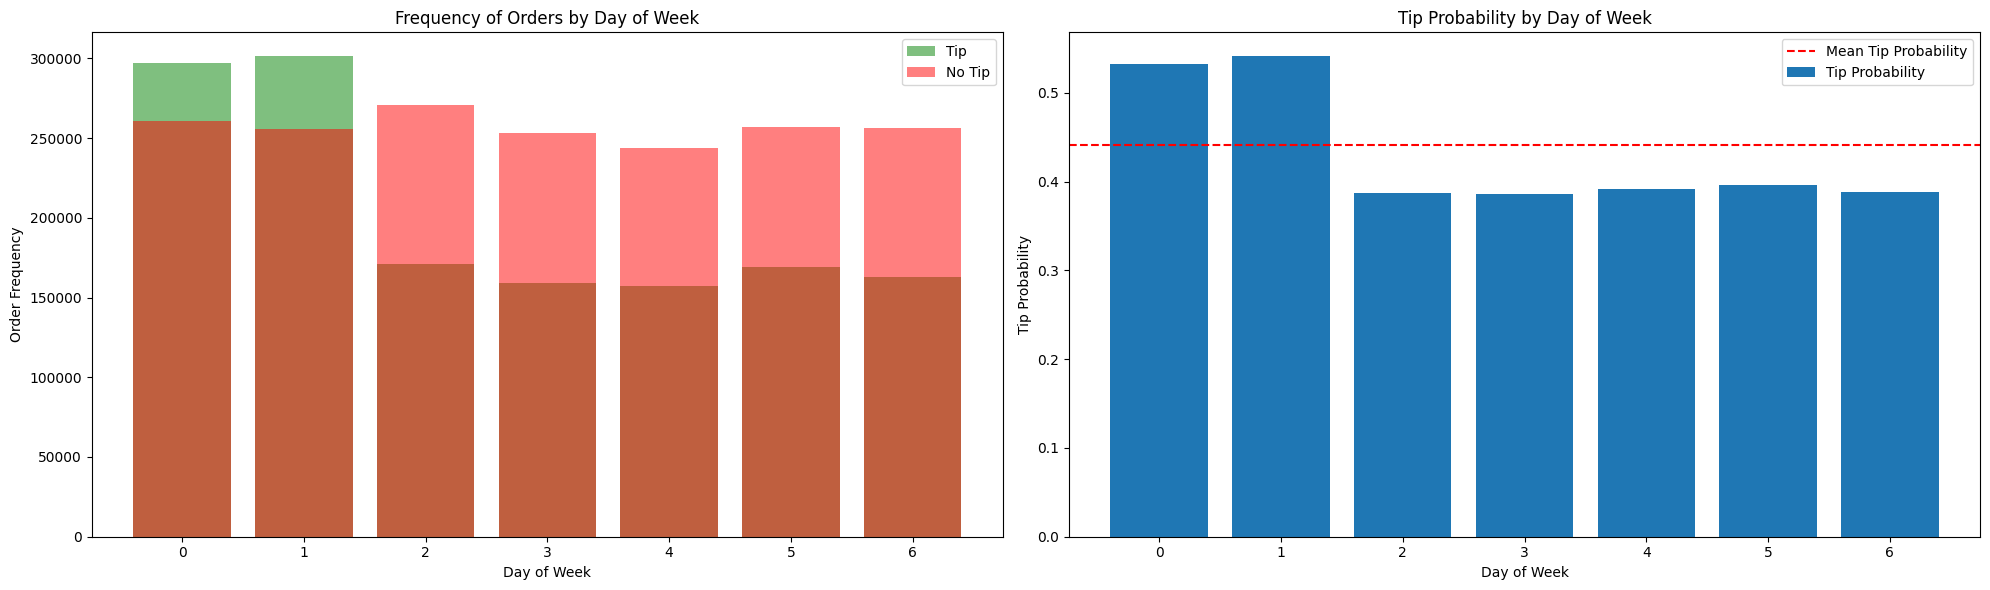

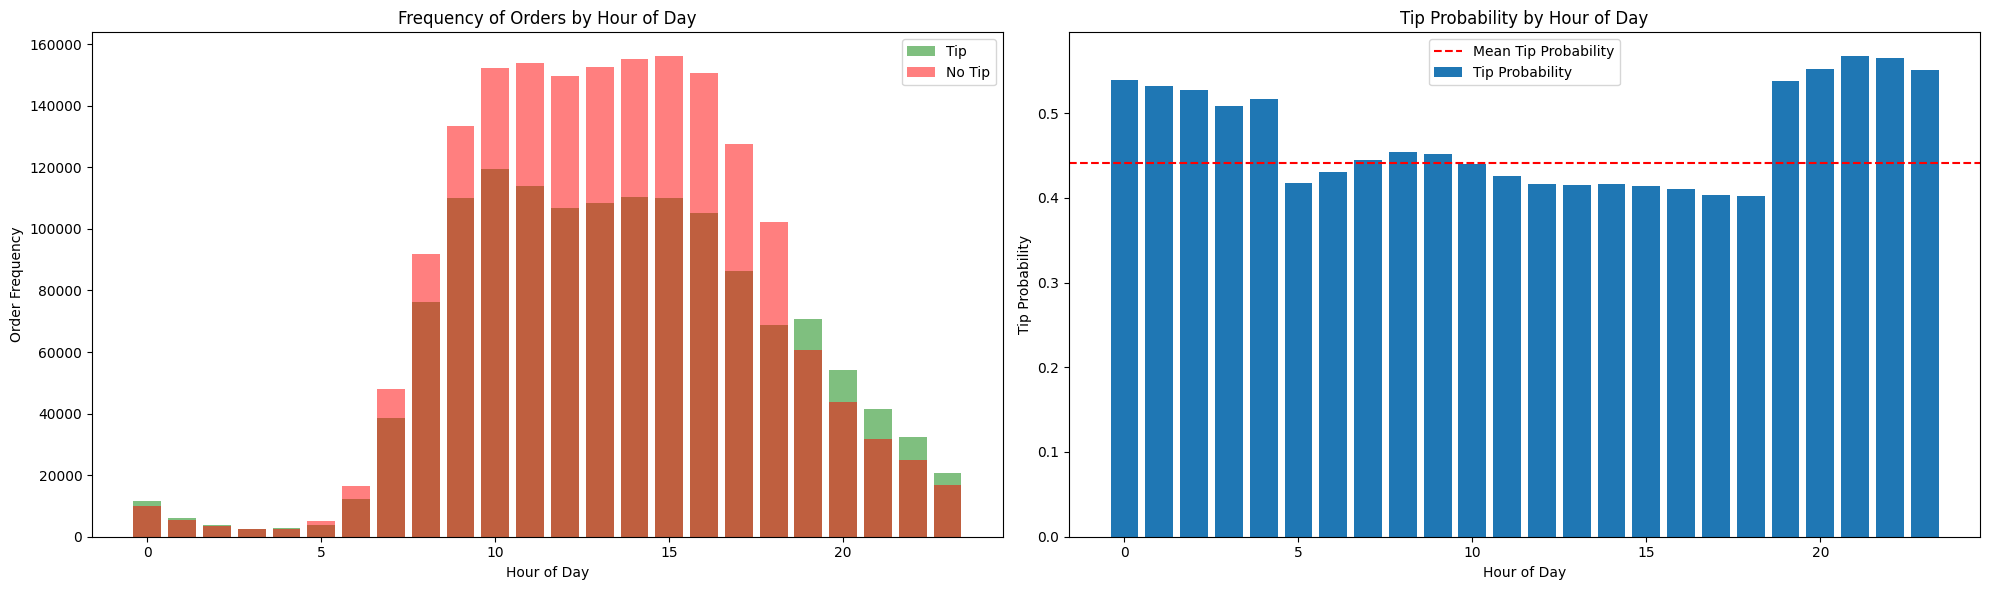

In [47]:
order_time.execute_analysis()

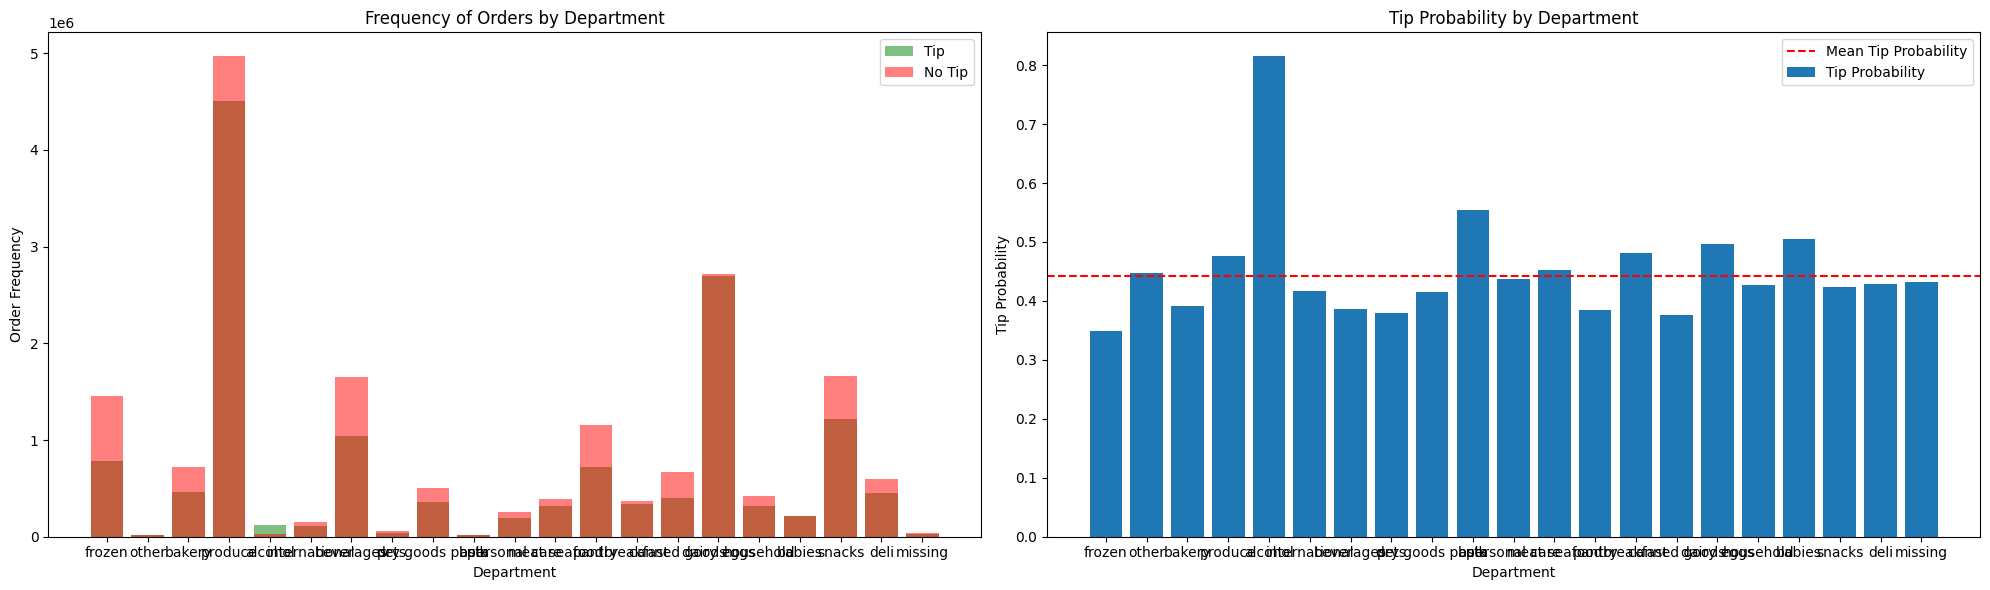

In [48]:
order_contents.execute_analysis()

In [49]:
a = order_contents
dow_hod_tip = a.orders_tip[['order_dow', 'order_hour_of_day', 'tip']]

cross_tab_dow = pd.crosstab(index=dow_hod_tip['order_dow'], columns=dow_hod_tip['tip'], margins=True)
cross_tab_dow

tip,0.0,1.0,All
order_dow,,,
0,260999,296773,557772
1,255469,301236,556705
2,270663,171292,441955
3,253353,159047,412400
4,243855,157357,401212
5,257090,168892,425982
6,256187,162661,418848
All,1797616,1417258,3214874


In [50]:
cross_tab_dow_normalized = pd.crosstab(index=dow_hod_tip['order_dow'], columns=dow_hod_tip['tip'], margins=True,
                                       normalize='index')
cross_tab_dow_normalized

tip,0.0,1.0
order_dow,,
0,0.467931,0.532069
1,0.458895,0.541105
2,0.612422,0.387578
3,0.614338,0.385662
4,0.607796,0.392204
5,0.603523,0.396477
6,0.611647,0.388353
All,0.559156,0.440844


In [51]:
cross_tab_hod = pd.crosstab(index=dow_hod_tip['order_hour_of_day'], columns=dow_hod_tip['tip'], margins=True)
cross_tab_hod

tip,0.0,1.0,All
order_hour_of_day,,,
0,9850,11522,21372
1,5434,6162,11596
2,3346,3724,7070
3,2516,2604,5120
4,2501,2674,5175
5,5227,3745,8972
6,16382,12410,28792
7,48096,38560,86656
8,91937,76384,168321


In [52]:
cross_tab_hod_normalized = pd.crosstab(index=dow_hod_tip['order_hour_of_day'], columns=dow_hod_tip['tip'], margins=True,
                                       normalize='index')
cross_tab_hod_normalized

tip,0.0,1.0
order_hour_of_day,,
0,0.460883,0.539117
1,0.468610,0.531390
2,0.473267,0.526733
3,0.491406,0.508594
4,0.483285,0.516715
5,0.582590,0.417410
6,0.568977,0.431023
7,0.555022,0.444978
8,0.546200,0.453800


In [53]:
prod_aisle_dep_tip = a.orders_joined[['product_id', 'aisle_id', 'department_id', 'tip']]
department_mapping = a.departments.set_index('department_id')['department']

In [54]:
cross_tab_department = pd.crosstab(index=prod_aisle_dep_tip['department_id'],
                                   columns=prod_aisle_dep_tip['tip'],
                                   margins=True).rename(index=department_mapping)
cross_tab_department

tip,0.0,1.0,All
department_id,,,
frozen,1455904,780528,2236432
other,20082,16209,36291
bakery,716354,460433,1176787
produce,4968630,4510661,9479291
alcohol,28448,125248,153696
international,157054,112199,269253
beverages,1649343,1040786,2690129
pets,60682,37042,97724
dry goods pasta,507177,359450,866627


In [55]:
cross_tab_department_normalized = pd.crosstab(index=prod_aisle_dep_tip['department_id'],
                                              columns=prod_aisle_dep_tip['tip'],
                                              margins=True,
                                              normalize='index').rename(index=department_mapping)
cross_tab_department_normalized

tip,0.0,1.0
department_id,,
frozen,0.650994,0.349006
other,0.553360,0.446640
bakery,0.608737,0.391263
produce,0.524156,0.475844
alcohol,0.185093,0.814907
international,0.583295,0.416705
beverages,0.613109,0.386891
pets,0.620953,0.379047
dry goods pasta,0.585231,0.414769


### Data Preparation

In [56]:
# TODO:
# - Remove first orders of each user
# - Encode discrete features (dow, hour of day)

### Model Training & Evaluation